In [ ]:
# CNN ( comvolution neural network ) --> 망을 깊게하는 그런 과정을 파악하는 것이 중요하다 ( 깊게 하기 위해 머리를 쓰는 것이 중요)

# -> pixel 의 주변을 적분한다 
# -> filter, padding, stride, con2D 이용
##  ( 필터의 사이즈가 중요하다 -> 필터사이즈가 크면 큰 특징을, 작게하면 작은 특징을 뽑아낸다 ) 
# -> pooling 이용 

#VGG ( 망을 깊게 함 ) 

#Inception : 망을 깊게하기전에 수평으로 늘어뜨렸다.  ( inception 늘여뜨려보니 정확해져간다. )  

# image generator : 이미지 증강을 한다. ( 이미지 부족 문제를 해결해준다 ) <- 전이학습도 데이터 부족문제를 해결한다 ( transduction ) 


# static mode ( 모델 다 만들고나서 마지막에 실행시켜봐야 어떤 데이터가 있는지 그떄서야 확인 가능하다 ) 
# dynamic mode ( = graph mode, static mode 와 다르게 데이터확인할 수 있으나 속도는 static mode 를 따라잡진 못한다 ) 

# efficientNet(필터사이즈, 깊이) , ResLet



In [ ]:
# transform learning 대세다 ( 범용적으로 학습을 한다 )

# global average pooling  

# GPU 설치

# MNIST CNN

##  데이터 로딩

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten  # flatten -> CNN 결과를 1차원으로 만들어준다. 
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
K.set_image_data_format('channels_first') # channels_first 로 할지, last 로 할지 정해주는 것이다!! 

batch_size= 128
num_classes = 10
epochs=12
img_rows, img_cols= 28,28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# channel_first, channel_last : 이미지 들어오는 방법 

## 데이터 전처리 ( 차수 조정, categorical, 정규화등  ) 

In [ ]:
#x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)  ## >>>channel_first이다 ( channel 즉 1이 앞에 있으니까) 
# x_test = x_test.reshape(x_test.shape[0], 1, 28,28 )   
#print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28, 28,1 )  ## >>>channel_last이다 ( channel 즉 1이 뒤에 있으니까) 
x_test = x_test.reshape(x_test.shape[0],28,28, 1 ) 


x_train = x_train.astype('float32')  # 타입을 바꾸는 이유는? >> 255로 나누기 위해서 
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train.shape:', x_train.shape) 
print(x_train.shape[0],'train samples') 
print(x_test.shape[0], 'test samples')  

y_train = keras.utils.to_categorical(y_train, num_classes)  # y_Train 과 y_test 를 categorical 로 바꿔줘야한다!!!! 
y_test = keras.utils.to_categorical(y_test, num_classes)

## 모델만들기

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape= (28,28,1))) #input shape 도 channel last 로 해줘야한다.(위에서 그렇게했으니까)
          # >> 32 는 '필터개수' , 필터사이즈는 3x3 이란 뜻이다.
          # >> 28x28 이 input 으로 들어왔고,  output 되는 출력값은 (128,26,26,32) 이다. (padding=valid 일때 이다)
          #                                   output 이 (128,28,28,32) 이면  padding=same 일때 이다.(모서리특징유지됨)
        
        
model.add(Conv2D(64 ,(3 , 3), activation='relu')) 
         # output 은 128 , 24 , 24 , 64 가 된다. (128장이 들어왔고 사이즈는 24x24)
    
    
model.add(MaxPooling2D(pool_size=(2,2)))  # output 은 128,12,12,64
model.add(Dropout(0.25))


model.add(Flatten())  # Flatten -> 1차원 배열로 바꿔준다 --> 1장에대해서 12x12x64= 9216으로 바뀐다 -> flatten 시켰으니 이제부터는 FFNN 망이다.
model.add(Dense(128, activation='relu'))  # 128(들어오는장) x 128(열값이라고생각하자)은 출력차수 즉,Dense 망의 가중치는 ?? 9216x128 이다. 

model.add(Dropout(0.5))  # 계산회로만 생략
model.add(Dense(10, activation='softmax')) #>> 128 x 10 으로 출력이 된다. 


# model.summary()

##  모델 compile ,fit

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])


# epoch 마다 accuracy 를 저장하게 해준다.  ( 안해도 별차니는 없다 ) 
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self,logs={}): # 오버라이팅 ( -> 반드시 이름이 on_train_begin 으로 ! )
        self.acc=[]              #>> 훈련시작시 이벤트(on_train_begin) 가 발생하도록 발생했다 
    def on_epochs_end(self, batch, logs={}):   # epoch 하나 끝날때마다 하도록 설정 
        self.acc.append(logs.get('acc'))
history = AccuracyHistory()  # 인스턴스 해주고 아래 fit에 , callbacks에  history 지정한다.



model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test,y_test), callbacks=[history])

## 모델 성능평가

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
# print(score[0])

# print(score[1])  -> accuracy 

## 모델 저장하기

In [ ]:
# HDFS(hadoop file system) : model 구조 전체를 저장
# 가중치, 구조, optimization, stage 등이 저장
# json 으로 저장할때는 구조, 가중치를 별도로 저장해야한다. => json 쓰는이유는? web에서도 tensorflow 를 쓰기때문이다. ( tensorflow.js import)
model.save('model_mnist.h5')
print('모델이 저장되었습니다')
from keras.models import load_model

model = load_model('model_mnist.h5')
print('모델이 로딩되었습니다')
model.summary()

In [ ]:
# 레이어 정보 확인
l1 = model.layers[0]
l2 = model.layers[1]

print(l1.name)
print(l2.name)
print(l1.input_shape)
print(l1.activation)
print(l1.output_shape)

# 데이터 generator

In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28,28, 1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(rotation_range=90)
#datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
#datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
#datagen = ImageDataGenerator(zca_whitening =True)           #>>>>>>>>>>     이미지 백색화 시키는법 -> noise 제거 (변수간 상관도를 없앤다 ( 즉 이미지의 pca 라고 생각하자 ))

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9,
    save_to_dir = 'images', save_prefix='aug', save_format='png'):   # 코드의미 : images 폴더에 저장됐는데 증강이 됐다 -> augment = 증강됐다. 
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break

# cifar10 CNN

## 데이터 로딩 후 train, test 나누기

In [ ]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
from keras.datasets import cifar10       # cifar10 은 10개로 구성 (airplane, automobile, bird,cat,deer, dog,frog,horse,ship,truc 분류문제)
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.layers import Dense, Dropout,Flatten, Activation
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.reset_default_graph()

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print('X_train shape : {}'.format(X_train.shape))
print('X_train shape : {}'.format(X_train.shape[0]))
print('X_test shape : {}'.format(X_test.shape[0]))



## Y값 범주화(categorical), 정규화

In [ ]:
NB_CALSSES = 10
Y_train = np_utils.to_categorical(Y_train, NB_CALSSES)
Y_test = np_utils.to_categorical(Y_test, NB_CALSSES)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
# 이미지 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

## 모델 만들기(망깊게만들기)

In [ ]:
IMG_CHANNELS=3
IMG_ROWS=32
IMG_COLS = 32
BATCH_SIZE = 128
NB_EPOCH = 20  # 40으로 바꾸자 
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
# residual 망의 영향  (conv를 2번 하고 나서 pooling 을 해주면 residual 의 영향을 받아서 더 좋다 ) -> 망을 더 깊게하기 때문이다

 #input=32x32x3(=칼라) -> 가중치 = 32x32x32 
model.add(Conv2D(32,kernel_size = 3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))

model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Conv2D(64,kernel_size = 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


In [ ]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs= NB_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

## data 증강

In [ ]:
datagen = ImageDataGenerator(      
    featurewise_center=False,
    samplewise_center = False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,         #>>>>>>>> 이미지 백색화는 이미지 PCA ( 이미지 노이즈 제거 효과 있다 ) 
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip = True,
    vertical_flip=False)
datagen.fit(X_train) 

In [ ]:
# generator 하고 나서 model 에 다시 fit 시킬때는 아래처럼 한다. 
#= 케라스에서는 모델을 학습시킬 때 주로 fit() 함수를 사용하지만
# 제네레이터로 생성된 배치로 학습시킬 경우에는 
# fit_generator() 함수를 사용합니다.
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                   samples_per_epoch=X_train.shape[0], nb_epoch=NB_EPOCH, verbose=VERBOSE)

# flow : 흘러들어가진다 

In [ ]:
score = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE,verbose=VERBOSE )
print('\nTest Score:', score[0])
print('\nTest accuracy:', score[1])

## json 파일로 저장

In [ ]:
# json 파일 형식으로 저장하기 
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)

# weights 를 h5 파일 포맷으로 만들어 저장하기 ( json 은 가중치 따로 저장)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [ ]:

# 저장된 json 파일로부터 모델 로드하기
from keras.models import model_from_json
json_file = open('cifar10_architecture.json', 'r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# 로드한 모델에 weight 로드하기 
loaded_model.load_weights('cifar10_weights.h5')
print("Loaded model from disk")

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
#Q . 1. accuracy graph 를 출력해보시오 
#    2. 이미지 cat, dog 를 다운로드한 후 다음 위의 모델로 예측해보시오 

In [ ]:
import numpy as np   
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json

In [ ]:
img_names = ['cat.jpg', 'dog.jpg']
imgs = [resize(imread(img_name), (32,32)).astype('float32') 
        for img_name in img_names]
imgs = np.array(imgs) / 255
predictions = model.predict_classes(imgs)
print(predictions)

# 전이학습

In [ ]:
# 전이(transfer learning) 학습 application
# 반지도학습 : 일부데이터에만 라벨이 없다. ( Knn : 주변에 있는 비슷한 것의 라벨을 가져온다 ) , Trenductive SVM 
#- 가중치 활용 : 그대로 적용
#- 가중치 중 일부만 활용
#- FFNN 부분만 학습해서 사용 

In [ ]:
# pre-trained, fine-tuning  ( FFNN 부분만 domin knwledge

In [ ]:
# RESNET : ( 입력되는 데이터를 identity 시켜줘서 더해주는 망을 만든다 ) ????

In [ ]:
import PIL
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
import matplotlib.pyplot as plt

# 전처리
filename = 'banana.jpg'
original = load_img(filename, target_size=(224,224))  #어떤이미지가 들어오더라도 사이즈를 (224,224) 로 고정해준다. 
print('PIL image size', original.size)


In [ ]:
plt.imshow(original)
plt.show()
numpy_image = img_to_array(original)  # 이미지를 배열로 만들어준다. 
plt.imshow(np.uint8(numpy_image))
print('numpy array size' , numpy_image.shape)   # 차원확대 : 여러장 처리, 1장( 3차원->4차원으로 확장)
image_batch=np.expand_dims(numpy_image, axis=0)
print('image array size' , image_batch.shape)   


#prepare the image for the resnet50 model
precessed_image = resnet50.preprocess_input(image_batch.copy())
# dense 이용해서 모델을 생성, 라벨 -> 확률

resnet_model = resnet50.ResNet50(weights = 'imagenet')  # resnet50 이 쓰는 가중치 imagenet 
predictions = resnet_model.predict(precessed_image)
label = decode_predictions(predictions)


In [ ]:
print(label)  # 예상되는 목록 5개가 나옴.

# VGG16

In [ ]:
# tf.keras
# fine_tuning : FFNN 부분만 학습


In [ ]:
# resnet, vgg16() -> 동영상 처리에도 많이 쓴다. 
# vgg16 : 깊은망임 

In [1]:
from numpy.random import randn
import pathlib
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib.image import imread
from keras.preprocessing import image
# tf.enable_eager_execution()  -> 2.0 이 아닌경우 맨처음에 실행해줘야한다
AUTOTUNE = tf.data.experimental.AUTOTUNE

Using TensorFlow backend.


In [2]:
data_dir = 'C:/Users/ICT01_17/Downloads/전달/flowers/flower_photos'
data_dir = pathlib.Path(data_dir)
label_names= {'daisy':0, 'dandelion':1, 'roses':2, 'sunflowers':3, 'tulips':4}
label_key = ['daisy','dandelion','roses','sunflowers','tulips']

In [3]:
all_images = list(data_dir.glob("*/*")) # 모든데이터의 파일명을 읽어온다. 
all_images = [str(path) for path in all_images]  
random.shuffle(all_images) 

In [4]:
 # all_images 는 화일명인데 이름에 대한 라벨을 할당해줘야한다   # pathlib.Path 는 디렉터리의 경로를 관리하는 라이브러리다. (?)
all_labels = [label_names[pathlib.Path(path).parent.name] for path in all_images]  # >>> 라벨을 달아주는 코드이다.

data_size = len(all_images)
train_test_split=(int)(data_size*0.2)  # 20: 80로 나눴다. 
x_train=all_images[train_test_split:] # 이미 위에서 shuffle 해줬으니 이렇게 앞을 불러오고 뒤를 불러오는 방식으로 해도 괜찮다. 
x_test=all_images[:train_test_split]
y_train=all_labels[train_test_split:]
y_test = all_labels[:train_test_split]
IMG_SIZE=160
BATCH_SIZE=32

In [5]:
def _parse_data(x,y):
    image = tf.read_file(x)  # 데이터 읽는다. 
    image = tf.image.decode_jpeg(image, channels= 3) # 데이터를 jpeg 파일로 해독해라(읽는다) ,채널은3개다=칼러이미지다. 
    image = tf.cast(image,tf.float32)
    image = (image/127.5) -1      # 데이터를 나누기위해서 float 형으로 바꿈-> 왜 127.5로 나누고 -1인가? 이미지를 -1에서 1사이즈로 만들기위해서 
                                  # >> 이미지 사이즈를 통일시켜준다. 
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) # 이미지 사이즈 통일해준다 ( 160x160)
    return image,y 

def _input_fn(x,y): 
    # 기본단위 요소로 분해 
    ds = tf.data.Dataset.from_tensor_slices((x,y))   #imageDataGenerator 와 비슷한 역할을 하는 것= from_tensor_slices 로 dataset 을 생성해준다. 
    ds = ds.map(_parse_data)  # map? 언제쓰나 ? 함수를 적용할때 사용한다. ( 데이터마다 함수를 적용할때 사용) 
                            # parse_data 는 위에나온것
    ds = ds.shuffle(buffer_size=data_size)  #shuffle 하려면  충분한 공간확보를 해야하므로 data_size 를 해줬다. 
    # shuffle : 뒤섞어라 
    ds = ds.repeat()  # 데이터가 부족하면 처음부터 다시 시작하라는 뜻 
    ds = ds.batch(BATCH_SIZE)  # batch 는 데이터를 한번에 읽어들일 minibatch size 를 말한다. 
    ds = ds.prefetch(buffer_size=AUTOTUNE)  # 데이터를 읽어올때 시간이 손실이되니까 너가 알아서 조정해라 (autotune) : 몇개의 데이터를 읽어올지 너가 정해라
     # 즉 학습할때는 batchsize 만큼 주지만 몇개를 읽을지는 너가 알아서 정하라는뜻! 
    return ds


train_ds = _input_fn(x_train,y_train)
validation_ds = _input_fn(x_test, y_test)

In [6]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
VGG16_MODEL = tf.keras.applications.VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet') 
# 이미 tf안에 keras 안에 applications 안에 vgg16 모델 만들어져있다. 
# include_top=False 인경우에는 반드시 input_shape=IMG_shape 을 지정해야한다. 
# wieghts 는 이미 학습된 것을 사용한다. ( imagenet) 
#>> 즉vgg16 에는 convolution 에 대한 가중치 학습이 없다. ( 학습시켜둔것 그대로 쓰고 있다 ) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
VGG16_MODEL.trainable =False  # >>>>> vgg16 모델에는 flatten 이 없다. ( 그걸 대신 하는 것이 아래 globalaveragepooling2d 이다.) # 원래, flatten 할때 가중치가 필요)


global_average_layer = tf.keras.layers.GlobalAveragePooling2D()


prediction_layer = tf.keras.layers.Dense(len(label_names),activation='softmax') # ffnn 의 가중치는 학습이 됐다. ->이렇게만 했는데 80퍼가 나옴.

In [8]:
model=tf.keras.Sequential([ VGG16_MODEL, global_average_layer, prediction_layer]) 
                         # -> 이렇게 묶어준다. ( 즉 model 은 vgg16가중치를와 FFNN 의 가중치학습을 이용해서 80퍼를 만들어냄 )

In [9]:
model.compile(optimizer=tf.train.AdamOptimizer(),  # tf안에 있는 adam 을 지정해줬다. 근데 loss 는 keras 안에 있는 것을 사용했다. 
             loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
# sparse_categorical_crossentropy 은 희소행렬을 의미한다. --> 분류하는 것이 많을때 쓴다. (한 1000개 정도로 분류될때 쓰기 좋다 ) 

In [10]:
history = model.fit(train_ds, epochs=100, steps_per_epoch=2)

Train on 2 steps
Epoch 1/100
2/2 [==============================] - 11s 5s/step - loss: 1.9631 - acc: 0.1875
Epoch 2/100
2/2 [==============================] - 0s 185ms/step - loss: 2.1081 - acc: 0.1094
Epoch 3/100
2/2 [==============================] - 0s 185ms/step - loss: 1.8612 - acc: 0.1250
Epoch 4/100
2/2 [==============================] - 0s 185ms/step - loss: 1.6333 - acc: 0.2812
Epoch 5/100
2/2 [==============================] - 0s 182ms/step - loss: 1.7663 - acc: 0.1562
Epoch 6/100
2/2 [==============================] - 0s 185ms/step - loss: 1.6640 - acc: 0.2344
Epoch 7/100
2/2 [==============================] - 0s 185ms/step - loss: 1.6170 - acc: 0.2500
Epoch 8/100
2/2 [==============================] - 0s 181ms/step - loss: 1.6424 - acc: 0.1250
Epoch 9/100
2/2 [==============================] - 0s 185ms/step - loss: 1.6274 - acc: 0.2812
Epoch 10/100
2/2 [==============================] - 0s 185ms/step - loss: 1.6211 - acc: 0.4219
Epoch 11/100
2/2 [==========================

2/2 [==============================] - 0s 180ms/step - loss: 0.9689 - acc: 0.7188
Epoch 88/100
2/2 [==============================] - 0s 193ms/step - loss: 0.9367 - acc: 0.7031
Epoch 89/100
2/2 [==============================] - 0s 189ms/step - loss: 1.0797 - acc: 0.6406
Epoch 90/100
2/2 [==============================] - 0s 192ms/step - loss: 1.0617 - acc: 0.6875
Epoch 91/100
2/2 [==============================] - 0s 185ms/step - loss: 1.0829 - acc: 0.6250
Epoch 92/100
2/2 [==============================] - 0s 185ms/step - loss: 0.9810 - acc: 0.6562
Epoch 93/100
2/2 [==============================] - 0s 189ms/step - loss: 1.0003 - acc: 0.6875
Epoch 94/100
2/2 [==============================] - 0s 181ms/step - loss: 0.9335 - acc: 0.7188
Epoch 95/100
2/2 [==============================] - 0s 185ms/step - loss: 0.9760 - acc: 0.7656
Epoch 96/100
2/2 [==============================] - 0s 190ms/step - loss: 0.9925 - acc: 0.7188
Epoch 97/100
2/2 [==============================] - 0s 185ms/st

KeyError: 'val_acc'

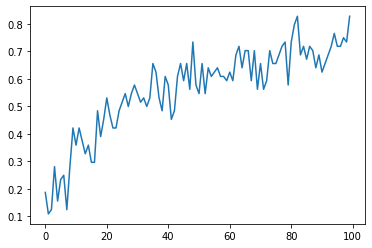

In [12]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()